In [26]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [27]:
class vaccum_cleaner:
    suction_capacity = ctrl.Antecedent(np.arange(250, 451, 1),'suction_capacity')
    air_volume = ctrl.Antecedent(np.arange(50, 101, 1),'air_volume')
    rating  = ctrl.Antecedent(np.arange(0, 11, 1),'rating')
    suctionC = ['LowSuction', 'MediumSuction', 'HighSuction']
    airV = ['LowAirV', 'MediumAirV', 'HighAirV']
    suction_capacity.automf(names=suctionC)
    air_volume.automf(names=airV)
    rating['Low'] = fuzz.trimf(rating.universe, [0,0, 5])
    rating['Medium'] = fuzz.trimf(rating.universe, [0, 5, 10])
    rating['High'] = fuzz.trimf(rating.universe, [5, 10, 10])
    rule1 = ctrl.Rule(suction_capacity['HighSuction'] | air_volume['LowAirV'], rating['High'])
    rule2 = ctrl.Rule(suction_capacity['MediumSuction'] | air_volume['LowAirV'], rating['Medium'])
    rule3 = ctrl.Rule(suction_capacity['LowSuction'] | air_volume['LowAirV'], rating['Low'])
    rule4 = ctrl.Rule(suction_capacity['HighSuction'] | air_volume['HighAirV'], rating['High'])
    rule5 = ctrl.Rule(suction_capacity['MediumSuction'] | air_volume['MediumAirV'], rating['Medium'])
    rule6 = ctrl.Rule(suction_capacity['LowSuction'] | air_volume['MediumAirV'], rating['Medium'])
    rule7 = ctrl.Rule(suction_capacity['HighSuction'] | air_volume['MediumAirV'], rating['High'])
    rule8 = ctrl.Rule(suction_capacity['MediumSuction'] | air_volume['HighAirV'], rating['High'])
    rule9 = ctrl.Rule(suction_capacity['LowSuction'] | air_volume['HighAirV'], rating['Medium'])
    vaccum_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
    vaccum = ctrl.ControlSystemSimulation(washing_ctrl)

In [28]:
vaccum_cleaner.vaccum.input['suction_capacity'] = 60
vaccum_cleaner.vaccum.input['air_volume'] = 70

KeyError: 'rating'

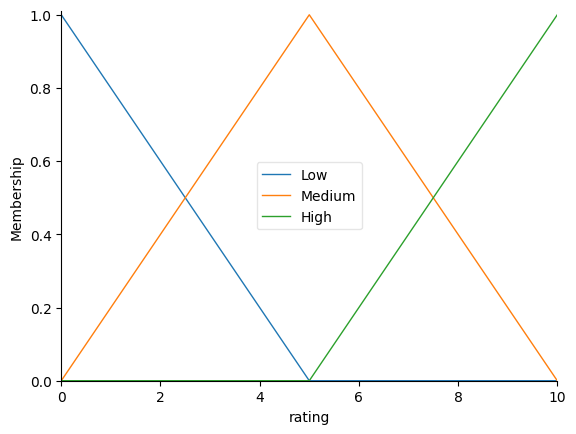

In [29]:
vaccum_cleaner.rating.view(sim=vaccum_cleaner.vaccum)
print(vaccum_cleaner.vaccum.output['rating'])